In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.4.1


In [3]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [5]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()
X_train,X_test = X_train/255,X_test/255
X_train.shape

4423680/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [6]:
### para la convulcion X debe tener # dimensiones aca solo tiene dos, agregamos una dimension extra 28X28X1

X_train = np.expand_dims(X_train,-1)

X_test = np.expand_dims(X_test,-1)

X_train.shape

(60000, 28, 28, 1)

In [7]:
### obtenemos el tamaño del output 

K = len(set(y_train))

print(K,set(y_train))

10 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [9]:
# cosntruccion del modelo


i = Input(shape= X_train[0].shape)

x = Conv2D(32,kernel_size=(3,3),strides=2,activation='relu')(i)

x = Conv2D(64,kernel_size=(3,3),strides=2,activation='relu')(x)

x = Conv2D(128,kernel_size=(3,3),strides=2,activation='relu')(x)

x = Flatten()(x)

x = Dense(512,activation='relu')(x)

x = Dropout(0.2)(x)

x = Dense(K,activation='softmax')(x)

model = Model(i,x)

In [11]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

r = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1351 - accuracy: 0.9474 - val_loss: 0.3815 - val_accuracy: 0.9001
Epoch 2/15
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1128 - accuracy: 0.9561 - val_loss: 0.3856 - val_accuracy: 0.8966
Epoch 3/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1070 - accuracy: 0.9596 - val_loss: 0.4519 - val_accuracy: 0.8942
Epoch 4/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0947 - accuracy: 0.9635 - val_loss: 0.4329 - val_accuracy: 0.8900
Epoch 5/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0889 - accuracy: 0.9669 - val_loss: 0.4802 - val_accuracy: 0.8963
Epoch 6/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0764 - accuracy: 0.9720 - val_loss: 0.4804 - val_accuracy: 0.8966
Epoch 7/15
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0768 - accuracy: 0.9715 - val_loss: 0.5107 -

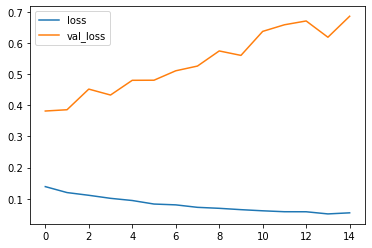

In [14]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()

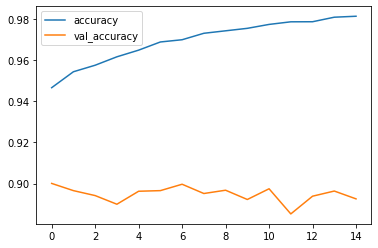

In [16]:
plt.plot(r.history['accuracy'],label = 'accuracy')
plt.plot(r.history['val_accuracy'],label = 'val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[862   6  24  14   3   2  85   0   4   0]
 [  7 975   0   9   4   0   2   0   3   0]
 [ 21   1 865   7  48   0  55   0   3   0]
 [ 25  11  18 884  34   3  23   0   2   0]
 [  1   3  87  21 808   0  76   0   4   0]
 [  0   0   0   0   0 967   0  17   2  14]
 [118   3  80  18  82   2 685   0  12   0]
 [  0   0   0   0   0  14   0 955   3  28]
 [  3   0   5   3   4   2   9   2 972   0]
 [  0   0   0   0   0   7   1  39   0 953]]


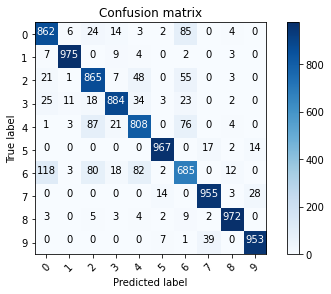

In [18]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [19]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

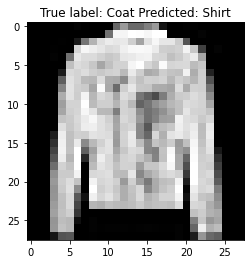

In [21]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));